In [1]:
import os
os.chdir("C:\\Users\gusta\JupyterLab\Laboratorio de Modelacion 2\Data")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations


import csv

In [2]:
category = pd.read_csv("cat_nombres.csv")
department = pd.read_csv("data_assorules_hat.csv")


transactions = pd.read_csv("data_assorules.csv")

categorias = sorted(transactions['Category'].unique())

supp=transactions.groupby("Category").apply(lambda x: x.Visit_nbr.count())


soportes = pd.read_csv("soporte_conjunto.csv").drop('Unnamed: 0',axis=1).set_axis(categorias).rename(columns=int)/supp.sum()

Implementamos a continuacion algunas de las reglas de asociacion propuestas para este proyecto. Detallaremos en cada una de ellas, como se obtienen a partir del soporte de cada item, asi como de los soportes por pares.

### 1) Confidence

Comenzamos definiendo del indicador $Confidence$ o "Confianza" en español. Este indica la proporción de transacciones en que encontramos un itemset $Y$ que también contienen el itemset $X$. Definimos Confidence como:
\begin{align}
conf(X \Rightarrow Y):= \dfrac{supp(X \Rightarrow Y)}{supp(X)} = \dfrac{supp(X \cup Y)}{Supp(X)} \in [0,1].
\end{align}
Que en términos de probabilidad queda escrito como:
\begin{equation}
conf(X\Rightarrow Y) = \dfrac{\mathbb{P}(X\cap Y)}{\mathbb{P}(X)} = \mathbb{P}(X\vert Y)
\end{equation}

In [3]:
soportes

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,0.003921,0.000151,0.002474,0.000276,0.000124,0.000191,0.000071,0.000051,0.000712,0.000041,...,7.952472e-06,0.000004,0.000030,0.000016,0.000004,1.016149e-05,7.510668e-06,2.341561e-05,8.836081e-07,0.000084
1,0.000000,0.000960,0.000205,0.000040,0.000022,0.000037,0.000011,0.000013,0.000127,0.000010,...,8.836081e-07,0.000003,0.000008,0.000006,0.000003,1.325412e-06,1.325412e-06,5.743452e-06,0.000000e+00,0.000012
2,0.000000,0.000000,0.006078,0.000423,0.000177,0.000319,0.000089,0.000068,0.001096,0.000062,...,1.237051e-05,0.000009,0.000044,0.000030,0.000006,1.325412e-05,9.719689e-06,2.871726e-05,1.325412e-06,0.000134
3,0.000000,0.000000,0.000000,0.001575,0.000109,0.000130,0.000038,0.000022,0.000330,0.000018,...,7.068864e-06,0.000003,0.000008,0.000009,0.000001,4.859844e-06,2.650824e-06,9.277885e-06,0.000000e+00,0.000053
4,0.000000,0.000000,0.000000,0.000000,0.000633,0.000068,0.000019,0.000011,0.000157,0.000013,...,2.650824e-06,0.000001,0.000005,0.000004,0.000000,4.418040e-07,8.836081e-07,3.092628e-06,0.000000e+00,0.000026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.029403e-04,1.192871e-05,4.418040e-07,0.000000e+00,0.000002
507,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,9.454606e-05,4.418040e-07,0.000000e+00,0.000001
508,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,4.020417e-04,0.000000e+00,0.000004
509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000


Desde la tabla de soportes no es dificil construir una nueva tabla de confianza entre pares de productos

In [4]:
conf_table = np.zeros((272,272))
conf_df= pd.DataFrame(conf_table, columns= categorias).set_axis(categorias).fillna(0)

In [5]:
for cat in categorias:
    for cat2 in categorias:
        if (soportes[cat][cat]!=0) and (soportes[cat2][cat2]!=0):
            if (cat >= cat2):
                conf_df[cat][cat2] = soportes[cat][cat2]/soportes[cat][cat]
            elif (cat < cat2):
                conf_df[cat][cat2] = soportes[cat2][cat]/soportes[cat2][cat2]

In [6]:
conf_df.to_csv('confidence.csv')                

In [7]:
conf_df

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,1.000000,0.156998,0.407065,0.175266,0.195531,0.132070,0.213245,0.191104,0.167847,0.115578,...,0.165138,0.037559,0.082833,0.042529,0.061224,0.098712,0.079439,0.058242,0.0,0.0
1,0.156998,1.000000,0.033728,0.025519,0.034218,0.025375,0.031788,0.047776,0.029883,0.028894,...,0.018349,0.032864,0.020408,0.016092,0.040816,0.012876,0.014019,0.014286,0.0,0.0
2,0.407065,0.033728,1.000000,0.268648,0.280028,0.220422,0.267550,0.253707,0.258330,0.175879,...,0.256881,0.098592,0.120048,0.079310,0.095238,0.128755,0.102804,0.071429,0.0,0.0
3,0.175266,0.025519,0.268648,1.000000,0.171788,0.090186,0.115232,0.080725,0.077884,0.050251,...,0.146789,0.028169,0.022809,0.024138,0.020408,0.047210,0.028037,0.023077,0.0,0.0
4,0.195531,0.034218,0.280028,0.171788,1.000000,0.046775,0.058278,0.041186,0.036964,0.037688,...,0.055046,0.014085,0.014406,0.011494,0.000000,0.004292,0.009346,0.007692,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.098712,0.012876,0.128755,0.047210,0.004292,0.025751,0.004292,0.008584,0.094421,0.004292,...,0.008584,0.000000,0.064378,0.017167,0.085837,1.000000,0.126168,0.001099,0.0,0.0
507,0.079439,0.014019,0.102804,0.028037,0.009346,0.014019,0.009346,0.004673,0.051402,0.004673,...,0.004673,0.000000,0.051402,0.004673,0.060748,0.126168,1.000000,0.001099,0.0,0.0
508,0.058242,0.014286,0.071429,0.023077,0.007692,0.020879,0.006593,0.008791,0.047253,0.005495,...,0.000000,0.003297,0.001099,0.005495,0.001099,0.001099,0.001099,1.000000,0.0,0.0
509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


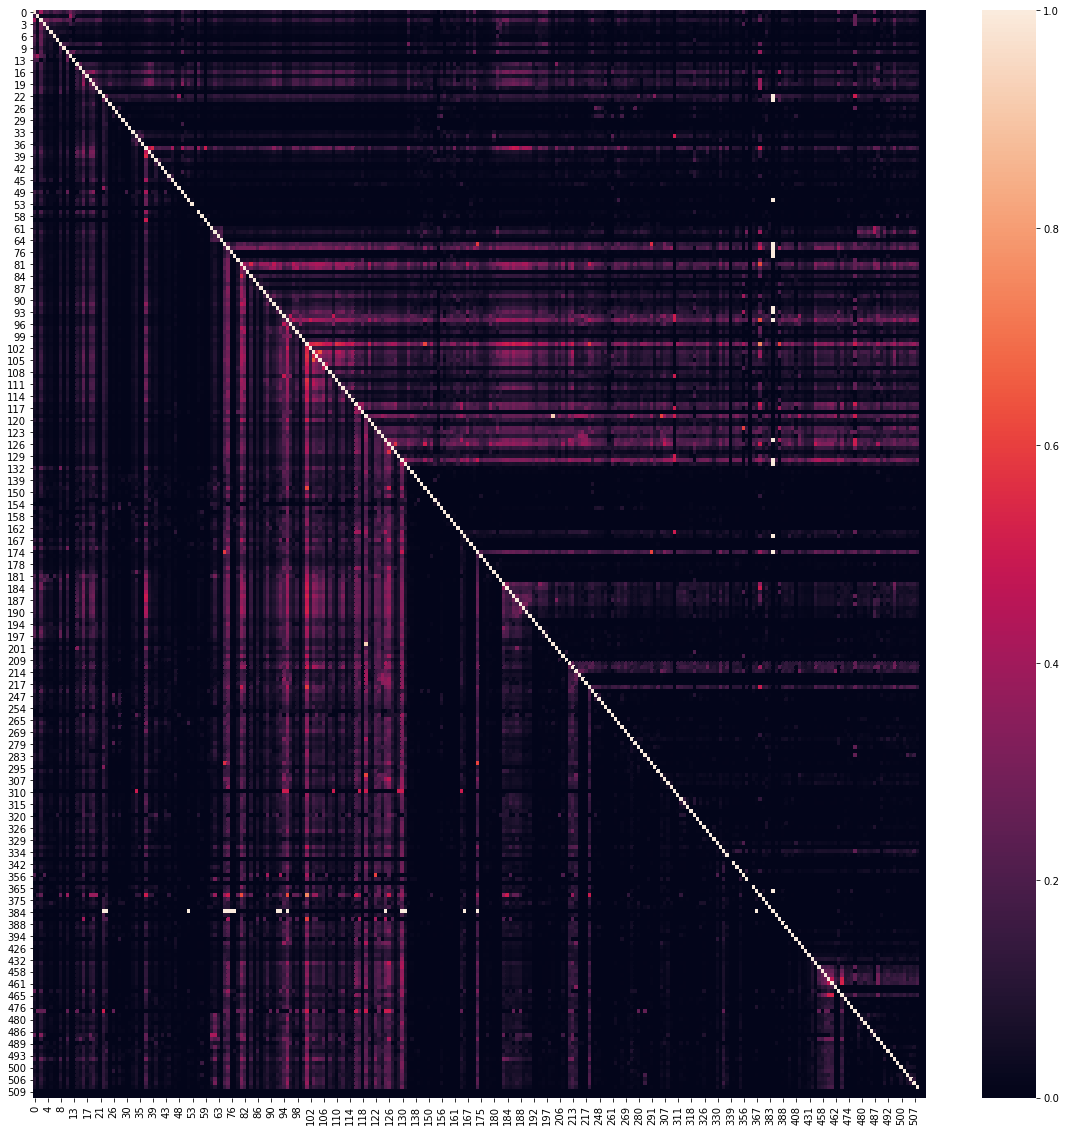

In [8]:
plt.figure(figsize = (20,20))
ax = sns.heatmap(conf_df)

### 2) Lift

Definamos ahora el indicador $Lift$. Este mide que tanto mas aparece el itemset $X \cup Y$ respecto a lo que se espera que ocurra en caso de que $X$ e $Y$ fueran estadisticamente independientes. Definimos el $Lift$ como:
\begin{align}
Lift(X \Rightarrow Y):= \dfrac{conf(X \Rightarrow Y)}{supp(Y)}  \in [0,\infty].
\end{align}
Que en términos de probabilidad queda escrito como:
\begin{equation}
Lift(X\Rightarrow Y) = \dfrac{\mathbb{P}(X\cap Y)}{\mathbb{P}(X)\mathbb{P}(Y)}
\end{equation}

In [9]:
lift_table = np.zeros((272,272))
lift_df= pd.DataFrame(lift_table, columns= categorias).set_axis(categorias).fillna(0)

In [10]:
for cat in categorias:
    for cat2 in categorias:
        if (cat in conf_df.columns) and (cat2 in conf_df.index) and (soportes[cat][cat]!=0) and soportes[cat2][cat2]!=0:
            if cat>= cat2:
                lift_df[cat][cat2] = conf_df[cat][cat2]/soportes[cat2][cat2]
            elif cat< cat2:
                lift_df[cat][cat2] = conf_df[cat2][cat]/soportes[cat][cat] 

In [11]:
lift_df.to_csv('lift.csv')
lift_df

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,255.036282,40.040227,103.816470,44.699292,49.867429,33.682566,54.385220,48.738400,42.807006,29.476555,...,42.116083,9.578827,21.125454,10.846371,15.614466,25.175255,20.259892,14.853761,0.0,0.0
1,40.040227,1042.102670,35.148335,26.593198,35.658541,26.442838,33.126443,49.787442,31.141552,30.111007,...,19.121150,34.247506,21.267401,16.769468,42.534803,13.417631,14.608916,14.887181,0.0,0.0
2,103.816470,35.148335,164.530566,44.200864,46.073154,36.266138,44.020099,41.742516,42.503159,28.937537,...,42.264733,16.221323,19.751569,13.048976,15.669578,21.184193,16.914357,11.752183,0.0,0.0
3,44.699292,26.593198,44.200864,634.729950,109.038804,57.244065,73.141067,51.238497,49.435444,31.895977,...,93.171369,17.879717,14.477634,15.321068,12.953672,29.965792,17.796167,14.647614,0.0,0.0
4,49.867429,35.658541,46.073154,109.038804,1580.619413,73.932978,92.115568,65.099646,58.425645,59.571083,...,87.006573,22.262245,22.770028,18.168039,0.000000,6.783774,14.772144,12.158611,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,25.175255,13.417631,21.184193,29.965792,6.783774,17.819073,12.866708,32.007792,22.252814,12.203976,...,178.245226,0.000000,174.928538,44.663746,1321.682287,9714.364807,1225.644158,10.675126,0.0,0.0
507,20.259892,14.608916,16.914357,17.796167,14.772144,9.700570,28.018159,17.424803,12.114266,13.287506,...,97.035368,0.000000,139.670356,12.157305,935.368142,1225.644158,10576.855140,11.622918,0.0,0.0
508,14.853761,14.887181,11.752183,14.647614,12.158611,14.447809,19.766657,32.781607,11.136411,15.623771,...,0.000000,35.032456,2.985960,14.294853,16.920438,10.675126,11.622918,2487.304396,0.0,0.0
509,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0


<AxesSubplot:>

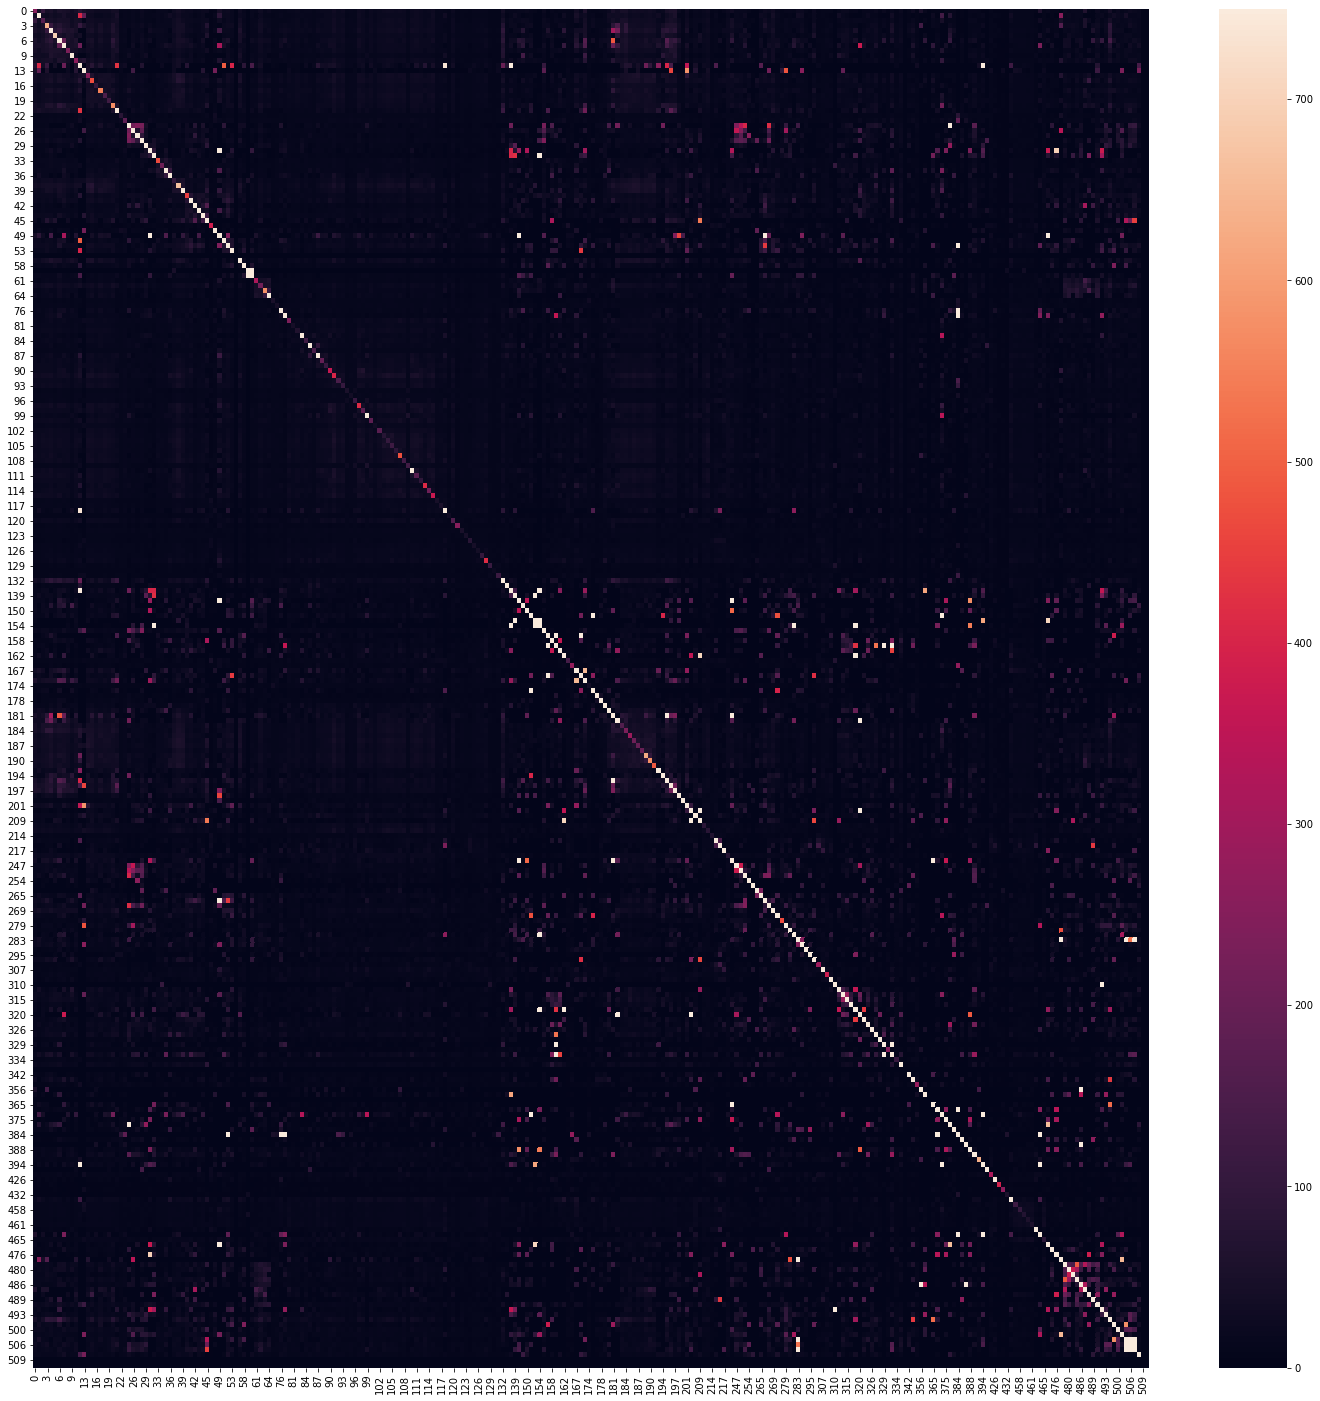

In [12]:
fig,ax= plt.subplots(figsize=(25,25))
sns.heatmap(lift_df, ax=ax, vmax=750)

### 3) ADDED-VALUE

En tercer lugar, veremos el indicador de $Added$-$Value$ o "valor agregado" en español. Este mide que tanto aumenta la probabilidad de aparicion de un itemset $Y$ dado que el conjunto tambien contenga a $X$, es decir, medimos el aumento de $\mathbb{P}(Y\vert X)$ respecto a $\mathbb{P}(Y)$. Definimos el indicador como
\begin{equation}
AV(X\Rightarrow Y) := conf(Y\Rightarrow X) - supp(Y) = \dfrac{supp(X\cup Y)}{supp(X)} - supp(Y)
\end{equation}
De este modo, en terminos de probabilidad tenemos que
\begin{equation}
AV(X\Rightarrow Y) = \mathbb{P}(Y\vert X) - \mathbb{P}(Y)
\end{equation}

In [13]:
added_value = np.zeros((272,272))
AD_df= pd.DataFrame(added_value, columns= categorias).set_axis(categorias).fillna(0)

In [14]:
for cat in categorias:
    for cat2 in categorias:
        if (cat in conf_df.columns) and (cat2 in conf_df.index):
            if cat>=cat2:
                AD_df[cat][cat2] = conf_df[cat2][cat] - (soportes[cat2][cat2])
            elif cat<cat2:
                AD_df[cat][cat2] = conf_df[cat2][cat] - (soportes[cat][cat])

In [15]:
AD_df.to_csv('added_value.csv')

In [16]:
AD_df

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,0.996079,0.153077,0.403144,0.171345,0.191610,0.128149,0.209324,0.187183,0.163926,0.111657,...,0.161217,0.033638,0.078912,0.038608,0.057303,0.094791,0.075518,0.054321,-0.003921,-0.003921
1,0.153077,0.999040,0.032769,0.024559,0.033258,0.024415,0.030828,0.046816,0.028924,0.027935,...,0.017389,0.031904,0.019449,0.015132,0.039857,0.011916,0.013059,0.013326,-0.000960,-0.000960
2,0.403144,0.032769,0.993922,0.262570,0.273950,0.214344,0.261472,0.247629,0.252252,0.169801,...,0.250803,0.092514,0.113970,0.073232,0.089160,0.122677,0.096726,0.065351,-0.006078,-0.006078
3,0.171345,0.024559,0.262570,0.998425,0.170212,0.088611,0.113656,0.079149,0.076309,0.048676,...,0.145214,0.026594,0.021234,0.022562,0.018833,0.045635,0.026462,0.021501,-0.001575,-0.001575
4,0.191610,0.033258,0.273950,0.170212,0.999367,0.046142,0.057645,0.040553,0.036331,0.037056,...,0.054413,0.013452,0.013773,0.010862,-0.000633,0.003659,0.008713,0.007060,-0.000633,-0.000633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.094791,0.011916,0.122677,0.045635,0.003659,0.024306,0.003958,0.008316,0.090178,0.003940,...,0.008536,-0.000094,0.064010,0.016783,0.085772,0.999897,0.126065,0.000996,-0.000103,-0.000103
507,0.075518,0.013059,0.096726,0.026462,0.008713,0.012574,0.009012,0.004405,0.047159,0.004321,...,0.004625,-0.000094,0.051034,0.004289,0.060683,0.126065,0.999905,0.001004,-0.000095,-0.000095
508,0.054321,0.013326,0.065351,0.021501,0.007060,0.019434,0.006260,0.008523,0.043010,0.005143,...,-0.000048,0.003203,0.000731,0.005110,0.001034,0.000996,0.001004,0.999598,-0.000402,-0.000402
509,-0.003921,-0.000960,-0.006078,-0.001575,-0.000633,-0.001445,-0.000334,-0.000268,-0.004243,-0.000352,...,-0.000048,-0.000094,-0.000368,-0.000384,-0.000065,-0.000103,-0.000095,-0.000402,0.000000,0.000000


<AxesSubplot:>

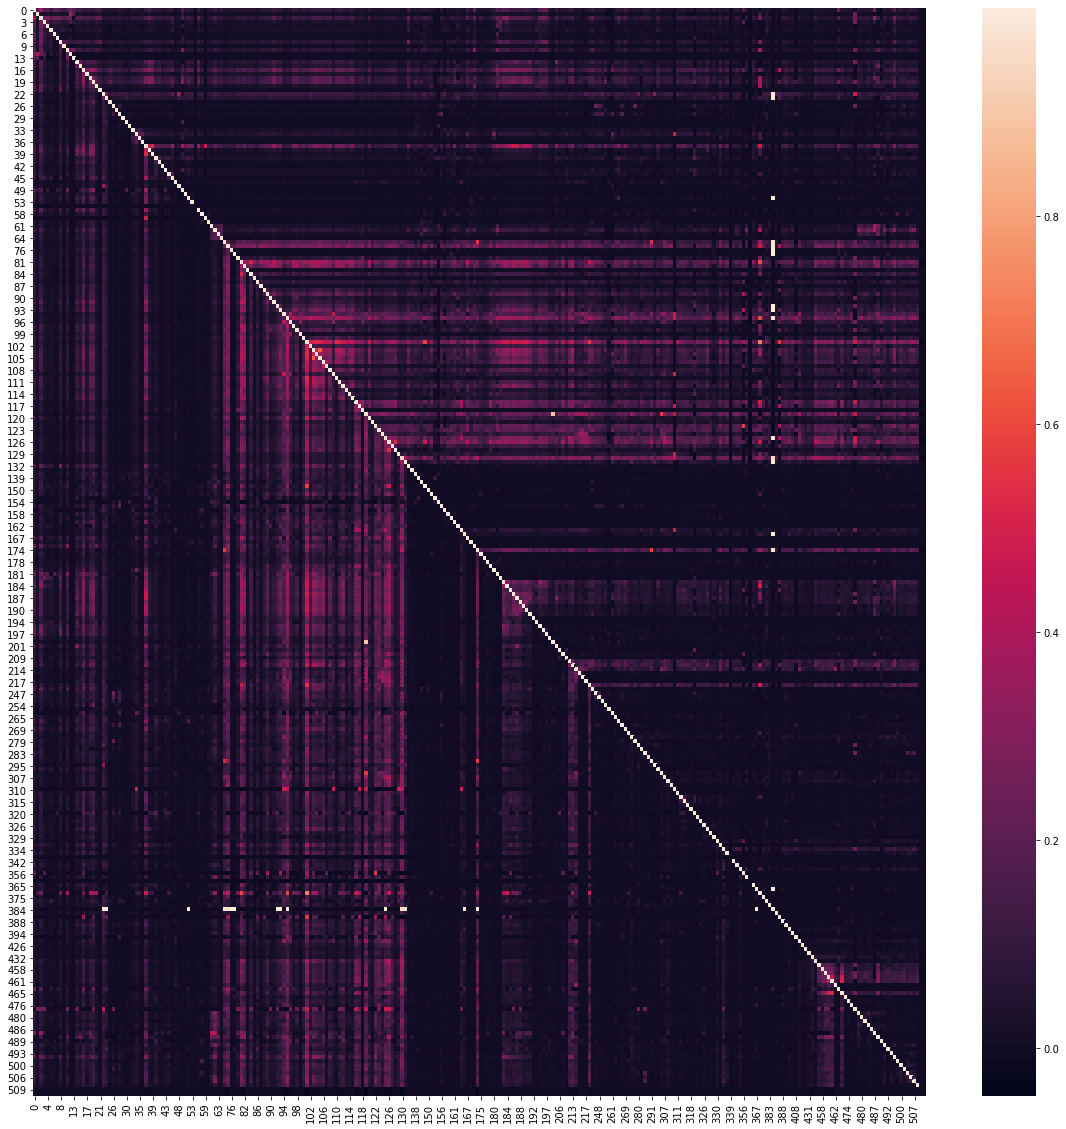

In [17]:
fig,ax= plt.subplots(figsize=(20,20))
sns.heatmap(AD_df, ax=ax)

### 4) Conviction

Definimos el indicador $Conviction$ o "Conviccion" como la como la comparacion entre la probabilidad de que aparezca el itemset $X$ sin que lo haga $Y$ de existir una dependencia estadistica y la frecuencia real de apariciones de $X$ sin $Y$, definimos lo anterior como
\begin{equation}
conviction(X\Rightarrow Y) = \dfrac{1-supp(Y)}{1-conf(X\Rightarrow Y)}.
\end{equation}
Lo cual queda escrito en términos de probabilidad como
\begin{equation}
conviction(X\Rightarrow Y) = \dfrac{\mathbb{P}(X)\mathbb{P}(\overline{Y})}{\mathbb{P}(X\cap \overline{Y})} = \dfrac{\mathbb{P}(\overline{Y})}{\mathbb{P}(\overline{Y}\vert X)} \in [0, \infty]
\end{equation}

In [18]:
conviction = np.zeros((272,272))
conviction_df= pd.DataFrame(conviction, columns= categorias).set_axis(categorias).fillna(0)

In [19]:
for cat in categorias:
    for cat2 in categorias:
        if (cat in conf_df.columns) and (cat2 in conf_df.index) and (conf_df[cat][cat2]!=1): #La diagonal queda con elementos nulos, pero no es relevante pues es conviction(X->X)
                conviction_df[cat][cat2] = (1 - soportes[cat2][cat2])/(1 - conf_df[cat][cat2])

In [20]:
conviction_df

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,0.000000,1.181586,1.679914,1.207758,1.238182,1.147649,1.266060,1.231405,1.196990,1.126248,...,1.193106,1.034950,1.086039,1.040323,1.061041,1.105173,1.082035,1.057680,0.996079,0.996079
1,1.185099,0.000000,1.033912,1.025202,1.034437,1.025051,1.031841,1.049165,1.029815,1.028766,...,1.017714,1.032988,1.019854,1.015380,1.041553,1.012071,1.013245,1.013519,0.999040,0.999040
2,1.676276,1.028616,0.000000,1.359021,1.380501,1.274949,1.356982,1.331812,1.340113,1.206040,...,1.337500,1.102632,1.129519,1.079541,1.098545,1.140807,1.107809,1.070378,0.993922,0.993922
3,1.210602,1.024570,1.365177,0.000000,1.205518,1.097395,1.128459,1.086100,1.082754,1.051251,...,1.170196,1.027364,1.021729,1.023121,1.019225,1.047896,1.027225,1.022009,0.998425,0.998425
4,1.242269,1.034775,1.388064,1.206656,0.000000,1.048406,1.061213,1.042295,1.037726,1.038507,...,1.057583,1.013644,1.013974,1.010988,0.999367,1.003675,1.008795,1.007114,0.999367,0.999367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.109410,1.012939,1.147665,1.049442,1.004207,1.026326,1.004207,1.008554,1.104152,1.004207,...,1.008554,0.999897,1.068697,1.017363,1.093784,0.000000,1.144267,1.000997,0.999897,0.999897
507,1.086192,1.014122,1.114478,1.028749,1.009339,1.014122,1.009339,1.004600,1.054088,1.004600,...,1.004600,0.999905,1.054088,1.004600,1.064576,1.144277,0.000000,1.001005,0.999905,0.999905
508,1.061417,1.014085,1.076490,1.023211,1.007347,1.020914,1.006232,1.008464,1.049174,1.005121,...,0.999598,1.002904,1.000698,1.005121,1.000698,1.000698,1.000698,0.000000,0.999598,0.999598
509,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:>

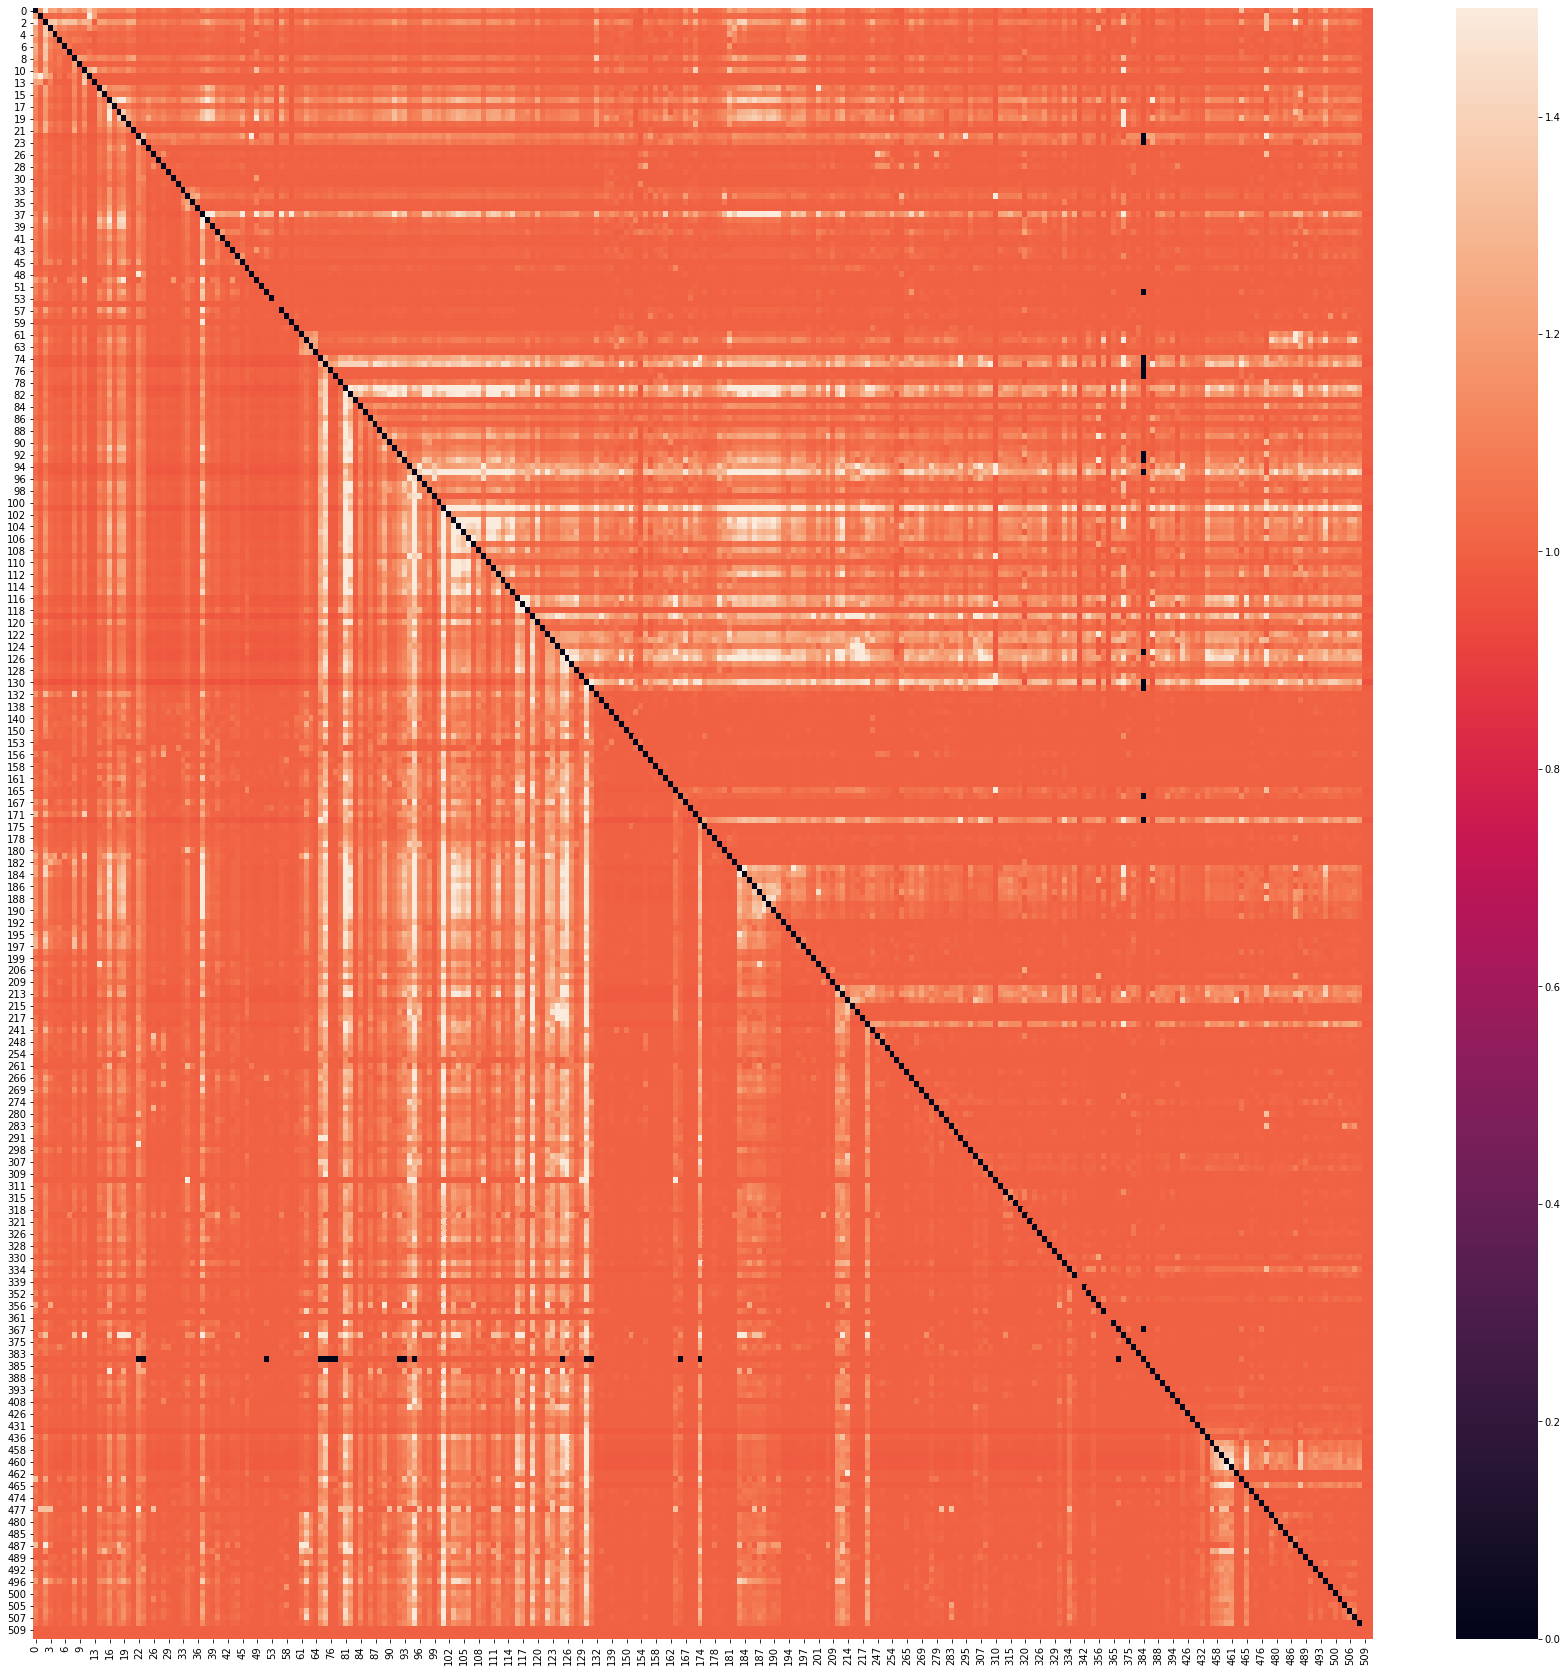

In [21]:
fig,ax= plt.subplots(figsize=(30,30))
sns.heatmap(conviction_df, ax=ax, vmin=0, vmax=1.5)

#### Veamos en particular la esquina superior del DF obtenido para el indicador $conviction$. Notemos que hemos conseguido identificar una regla de asociacion asimétrica

In [22]:
conviction_df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,496,497,500,504,505,506,507,508,509,510
0,0.000000,1.181586,1.679914,1.207758,1.238182,1.147649,1.266060,1.231405,1.196990,1.126248,...,1.193106,1.034950,1.086039,1.040323,1.061041,1.105173,1.082035,1.057680,0.996079,0.996079
1,1.185099,0.000000,1.033912,1.025202,1.034437,1.025051,1.031841,1.049165,1.029815,1.028766,...,1.017714,1.032988,1.019854,1.015380,1.041553,1.012071,1.013245,1.013519,0.999040,0.999040
2,1.676276,1.028616,0.000000,1.359021,1.380501,1.274949,1.356982,1.331812,1.340113,1.206040,...,1.337500,1.102632,1.129519,1.079541,1.098545,1.140807,1.107809,1.070378,0.993922,0.993922
3,1.210602,1.024570,1.365177,0.000000,1.205518,1.097395,1.128459,1.086100,1.082754,1.051251,...,1.170196,1.027364,1.021729,1.023121,1.019225,1.047896,1.027225,1.022009,0.998425,0.998425
4,1.242269,1.034775,1.388064,1.206656,0.000000,1.048406,1.061213,1.042295,1.037726,1.038507,...,1.057583,1.013644,1.013974,1.010988,0.999367,1.003675,1.008795,1.007114,0.999367,0.999367
5,1.150501,1.024552,1.280891,1.097538,1.047554,0.000000,1.081648,1.052297,1.084365,1.075575,...,1.122087,1.008020,1.019358,1.017263,1.026486,1.024948,1.012752,1.019848,0.998555,0.998555
6,1.270620,1.032487,1.364825,1.129863,1.061530,1.082852,0.000000,1.066428,1.018544,1.013675,...,1.047727,1.013947,1.004490,1.005445,1.006513,1.003975,1.009097,1.006301,0.999666,0.999666
7,1.235921,1.049891,1.339597,1.087522,1.042676,1.053537,1.066498,0.000000,1.010145,1.012451,...,1.018418,0.999732,1.006985,1.003191,0.999732,1.008388,1.004425,1.008599,0.999732,0.999732
8,1.196603,1.026430,1.342587,1.079861,1.033977,1.081326,1.014561,1.006128,0.000000,1.208266,...,1.233381,1.076631,1.073047,1.043745,1.084269,1.099580,1.049714,1.045143,0.995757,0.995757
9,1.130284,1.029392,1.212988,1.052540,1.038799,1.076752,1.013656,1.012366,1.212988,0.000000,...,1.008904,0.999648,1.006901,1.003107,1.006495,1.003957,1.004342,1.005171,0.999648,0.999648
